In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
# from data_loader import load_images_and_labels

import os
import numpy as np
import tensorflow as tf


# Preprocessing and Feature Engineering Data

In [66]:
def load_images_and_labels(directory, img_height, img_width, num_classes=101):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))[-num_classes:]
    # class_indices = {
    #     class_name: idx for idx, class_name in enumerate(class_names)
    # }  # {name: index}

    for class_name in class_names:
        class_dir = os.path.join(
            directory, class_name
        )  # caltech-101/101_ObjectCategories/class_name
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(
                    class_dir, img_name
                )  # caltech-101/101_ObjectCategories/class_name/img_name
                img = tf.keras.preprocessing.image.load_img(
                    img_path, target_size=(img_height, img_width)
                )
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(class_name)

    return np.array(images), np.array(labels), class_names


In [ ]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

images, labels, class_names = load_images_and_labels(directory, img_height, img_width, 101)

In [68]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1

n_samples = images.shape[0]
print("Number of samples and image shape:", n_samples, images.shape)
data = images.reshape((n_samples, -1))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Number of samples and image shape: 734 (734, 128, 128, 3)
Class Names: ['tick', 'trilobite', 'umbrella', 'watch', 'water_lilly', 'wheelchair', 'wild_cat', 'windsor_chair', 'wrench', 'yin_yang']
x_train shape: (587, 49152)
y_train shape: (587,)
x_test shape: (147, 49152)
y_test shape: (147,)


In [69]:
# print unique labels in each y_train and y_test
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: ['tick' 'trilobite' 'umbrella' 'watch' 'water_lilly' 'wheelchair'
 'wild_cat' 'windsor_chair' 'wrench' 'yin_yang']
Unique labels in y_test: ['tick' 'trilobite' 'umbrella' 'watch' 'water_lilly' 'wheelchair'
 'wild_cat' 'windsor_chair' 'wrench' 'yin_yang']


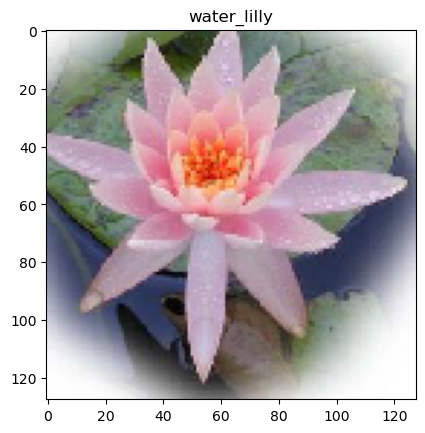

In [70]:
# show a random image
index = random.randint(0, n_samples)
plt.imshow(images[index])
plt.title(labels[index])
plt.show()

# SVC Model

In [ ]:
model = Pipeline([ ("svc", SVC(kernel="linear", verbose=1))])

In [73]:
model.fit(x_train, y_train)

[LibSVM]*
optimization finished, #iter = 101
obj = -0.003005, rho = 1.529600
nSV = 27, nBSV = 0
...*.*
optimization finished, #iter = 474
obj = -0.017078, rho = 0.680921
nSV = 68, nBSV = 0
..*.*
optimization finished, #iter = 718
obj = -0.027972, rho = 1.151320
nSV = 105, nBSV = 0
.*
optimization finished, #iter = 120
obj = -0.006171, rho = 0.385325
nSV = 29, nBSV = 0
.*.*
optimization finished, #iter = 254
obj = -0.012420, rho = 1.321491
nSV = 61, nBSV = 0
..*.*
optimization finished, #iter = 235
obj = -0.010249, rho = 0.817119
nSV = 51, nBSV = 0
...*.*
optimization finished, #iter = 420
obj = -0.013188, rho = 0.025694
nSV = 63, nBSV = 0
....*..*
optimization finished, #iter = 476
obj = -0.013666, rho = -0.310212
nSV = 54, nBSV = 0
..*.*
optimization finished, #iter = 290
obj = -0.011488, rho = 0.493883
nSV = 49, nBSV = 0
*
optimization finished, #iter = 114
obj = -0.004806, rho = -0.568366
nSV = 32, nBSV = 0
*
optimization finished, #iter = 195
obj = -0.009782, rho = -0.601848
nSV = 

Pipeline(steps=[('svc', SVC(kernel='linear', verbose=1))])

In [ ]:
y_pred = model.predict(x_test)

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted labels:", y_pred)
print("True labels:", y_test)
print("Misclassified samples:", np.where(y_test != y_pred))

Accuracy: 0.7414965986394558
Predicted labels: ['watch' 'tick' 'watch' 'wrench' 'umbrella' 'windsor_chair' 'tick'
 'water_lilly' 'wrench' 'umbrella' 'watch' 'windsor_chair' 'watch'
 'umbrella' 'trilobite' 'trilobite' 'trilobite' 'watch' 'wheelchair'
 'watch' 'watch' 'watch' 'watch' 'trilobite' 'trilobite' 'umbrella'
 'trilobite' 'watch' 'watch' 'yin_yang' 'umbrella' 'watch' 'wheelchair'
 'umbrella' 'watch' 'wheelchair' 'watch' 'umbrella' 'watch' 'tick'
 'trilobite' 'watch' 'wheelchair' 'yin_yang' 'watch' 'watch' 'water_lilly'
 'watch' 'wheelchair' 'water_lilly' 'wrench' 'umbrella' 'umbrella' 'watch'
 'watch' 'yin_yang' 'tick' 'watch' 'windsor_chair' 'watch' 'umbrella'
 'watch' 'trilobite' 'wrench' 'tick' 'watch' 'yin_yang' 'umbrella'
 'trilobite' 'watch' 'trilobite' 'trilobite' 'wheelchair' 'trilobite'
 'windsor_chair' 'trilobite' 'wheelchair' 'windsor_chair' 'tick' 'watch'
 'yin_yang' 'trilobite' 'wrench' 'watch' 'watch' 'windsor_chair'
 'trilobite' 'watch' 'wheelchair' 'wrench' 'tick

In [ ]:
y_test.shape, y_pred.shape

((147,), (147,))

In [ ]:
y_test

(array([6, 0, 3, 2, 2, 2, 0, 3, 8, 2, 3, 7, 3, 9, 1, 1, 1, 3, 5, 3, 3, 3,
        3, 1, 1, 8, 1, 3, 3, 9, 2, 4, 5, 2, 4, 5, 3, 3, 3, 0, 1, 3, 5, 9,
        5, 3, 6, 3, 5, 3, 8, 3, 3, 3, 3, 9, 3, 3, 7, 3, 8, 7, 1, 3, 6, 3,
        9, 4, 1, 7, 1, 1, 3, 1, 7, 1, 3, 7, 0, 3, 9, 1, 3, 3, 3, 7, 3, 3,
        5, 2, 0, 7, 9, 3, 9, 4, 7, 3, 3, 8, 8, 3, 3, 1, 1, 7, 3, 9, 2, 0,
        3, 9, 8, 3, 4, 3, 1, 5, 3, 3, 1, 2, 3, 1, 0, 4, 1, 3, 9, 1, 9, 7,
        9, 3, 8, 3, 1, 3, 8, 1, 5, 1, 0, 1, 2, 6, 6]),
 array([ 2.11457236,  1.81676953,  6.44452188,  4.14024269,  3.3776587 ,
         4.89456007,  2.32229791,  3.46344832,  7.85216512,  3.16577846,
         3.9985211 ,  5.62493678,  4.0079137 ,  5.01029959,  0.61018796,
         0.30092277,  2.54198925,  3.39341238,  3.47460373,  1.79391728,
         5.85875028,  6.00762097,  3.92118967,  1.98863597, -0.45085553,
         6.9228022 ,  2.62475715,  4.92039482,  3.70689877,  9.77657926,
         2.66677166,  3.98382623,  2.60872467,  2.2399059 ,  3.

In [ ]:
y_pred

array([ 2.11457236,  1.81676953,  6.44452188,  4.14024269,  3.3776587 ,
        4.89456007,  2.32229791,  3.46344832,  7.85216512,  3.16577846,
        3.9985211 ,  5.62493678,  4.0079137 ,  5.01029959,  0.61018796,
        0.30092277,  2.54198925,  3.39341238,  3.47460373,  1.79391728,
        5.85875028,  6.00762097,  3.92118967,  1.98863597, -0.45085553,
        6.9228022 ,  2.62475715,  4.92039482,  3.70689877,  9.77657926,
        2.66677166,  3.98382623,  2.60872467,  2.2399059 ,  3.62088863,
        4.39474771,  3.58531627,  3.92831463,  1.75883231,  7.10224893,
        0.83643306,  4.98128704,  5.6560284 ,  9.239487  ,  3.32328611,
        2.35958301,  2.98625759,  2.92476619,  4.2075538 ,  5.51337129,
        5.84320575,  2.70954021,  5.07968333,  4.65540866,  7.85295026,
       12.60344184,  3.13252291,  3.01884524,  8.88135377,  3.40877856,
        2.58195868,  3.66989129,  2.51885811,  4.08228258,  3.71109507,
        3.17112468,  5.63932911,  1.18628534,  1.86138309,  9.33

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets